In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df_principals = pd.read_csv('data_principals.tsv', delimiter='\t')  ### kedze povodne sme to stahovali bez principals

conn = sqlite3.connect('films.db')

df_principals.to_sql('title_principals', conn, if_exists='replace', index=False) ##tak teraz to este extra pridavame

conn.close()

In [2]:
# Connect to SQLite database
conn = sqlite3.connect('films.db')
# Querying the database
query = "SELECT * FROM title_ratings WHERE tconst IN (SELECT tb.tconst FROM title_basics AS tb WHERE tb.titleType = 'movie')"
df_title_ratings = pd.read_sql_query(query, conn)
df_title_ratings.replace("\\N", np.nan, inplace=True)

query = "SELECT nconst, primaryName FROM name_basics"
df_name_basics = pd.read_sql_query(query, conn)
df_name_basics.replace("\\N", np.nan, inplace=True)

query = "SELECT titleid, COUNT(CASE WHEN isOriginalTitle = 0 THEN 1 END) AS pocet_prekladov FROM title_akas GROUP BY titleid"
df_title_akas = pd.read_sql_query(query, conn)
df_title_akas.replace("\\N", np.nan, inplace=True)

query = "SELECT tconst, primaryTitle, isAdult, startYear, runtimeMinutes, genres  FROM title_basics WHERE titleType = 'movie'"
df_title_basics = pd.read_sql_query(query, conn)
df_title_basics.replace("\\N", np.nan, inplace=True)

#query = "SELECT * FROM title_crew"
#df_title_crew = pd.read_sql_query(query, conn)
#df_title_crew.replace("\\N", np.nan, inplace=True)

#query = "SELECT tconst, nconst, category FROM title_principals WHERE (category = 'actor' OR category = 'director') AND tconst IN (SELECT tb.tconst FROM title_basics AS tb WHERE tb.titleType = 'movie')"
#df_title_principals = pd.read_sql_query(query, conn)
# Close the connection
conn.close()

In [3]:
df_title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000009,5.3,207
1,tt0000147,5.3,489
2,tt0000502,4.1,15
3,tt0000574,6.0,862
4,tt0000591,5.0,21


In [4]:
df_title_akas.head()

,titleId,pocet_prekladov
0,tt0000001,7
1,tt0000002,7
2,tt0000003,8
3,tt0000004,7
4,tt0000005,11


In [5]:
df_title_basics['year_diff'] = df_title_basics['startYear']
df_title_basics['year_diff'] = df_title_basics['year_diff'].apply(lambda x: 2024 - int(x) if pd.notna(x) else np.nan)
df_title_basics.head()

,tconst,primaryTitle,isAdult,startYear,runtimeMinutes,genres,year_diff
0,tt0000009,Miss Jerry,0,1894,45,Romance,130.0
1,tt0000147,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",127.0
2,tt0000502,Bohemios,0,1905,100,NaN,119.0
3,tt0000574,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",118.0
4,tt0000591,The Prodigal Son,0,1907,90,Drama,117.0


In [6]:
df_title_crew.head()

NameError: name 'df_title_crew' is not defined

In [7]:
df_title_ratings['log_score'] = df_title_ratings['averageRating'] * np.log(df_title_ratings['numVotes'])
df_title_ratings['norm_score'] = (df_title_ratings['averageRating'] / max(df_title_ratings['averageRating'])) * (df_title_ratings['numVotes'] / max(df_title_ratings['numVotes']))
df_title_ratings['prag_score'] = (df_title_ratings['averageRating'] * df_title_ratings['numVotes']) / (np.mean(df_title_ratings['averageRating']) * np.mean(df_title_ratings['numVotes'])) 

In [8]:
df_title_ratings.describe()

,averageRating,numVotes,log_score,norm_score,prag_score
count,301868.000000,3.018680e+05,301868.000000,3.018680e+05,301868.000000
mean,6.175532,3.627837e+03,28.023937,8.984794e-04,1.136912
std,1.373577,3.584098e+04,14.541876,1.000128e-02,12.655354
min,1.000000,5.000000e+00,1.791759,2.116462e-07,0.000268
25%,5.300000,1.900000e+01,17.891328,4.137683e-06,0.005236
50%,6.300000,6.100000e+01,24.609682,1.314323e-05,0.016631
75%,7.100000,3.150000e+02,34.169375,6.213667e-05,0.078626
max,10.000000,2.834920e+06,138.174976,9.300000e-01,1176.797173


In [9]:
df = df_title_ratings[df_title_ratings['log_score'] > 120]
df.sort_values(by=['log_score'])

,tconst,averageRating,numVotes,log_score,norm_score,prag_score
56999,tt0103064,8.6,1155012,120.052743,0.350384,443.366431
128640,tt0407887,8.5,1397845,120.278760,0.419119,530.341733
137870,tt0482571,8.5,1414680,120.380518,0.424166,536.728924
39542,tt0073486,8.7,1054523,120.656812,0.323619,409.499305
174439,tt1345836,8.4,1795795,120.968050,0.532102,673.308201
79703,tt0172495,8.5,1586523,121.354971,0.475691,601.926077
65862,tt0120689,8.6,1379936,121.582910,0.418617,529.706444
204363,tt1853728,8.5,1659682,121.738161,0.497626,629.682567
41593,tt0076759,8.6,1428083,121.877854,0.433223,548.188298
55102,tt0099685,8.7,1232571,122.014131,0.378260,478.640075


In [39]:
df_films = df_title_ratings.set_index('tconst').join(df_title_akas.set_index('titleId'), how='inner')
df_films = df_films.join(df_title_basics.set_index('tconst'), how='inner')

df_films['startYear'] = df_films['startYear'].apply(lambda x: int(x) if pd.notna(x) else np.nan)
df_films['runtimeMinutes'] = df_films['runtimeMinutes'].apply(lambda x: int(x) if pd.notna(x) else np.nan)
df_films['isAdult'] = df_films['isAdult'].apply(lambda x: int(x) if pd.notna(x) else np.nan)

df_films.head()

,averageRating,numVotes,log_score,norm_score,prag_score,pocet_prekladov,primaryTitle,isAdult,startYear,runtimeMinutes,genres,year_diff
tt0000009,5.3,207,28.263410,0.000039,0.048969,4,Miss Jerry,0,1894.0,45.0,Romance,130.0
tt0000147,5.3,489,32.819521,0.000091,0.115681,2,The Corbett-Fitzsimmons Fight,0,1897.0,100.0,"Documentary,News,Sport",127.0
tt0000502,4.1,15,11.103006,0.000002,0.002745,1,Bohemios,0,1905.0,100.0,NaN,119.0
tt0000574,6.0,862,40.555532,0.000182,0.230853,8,The Story of the Kelly Gang,0,1906.0,70.0,"Action,Adventure,Biography",118.0
tt0000591,5.0,21,15.222612,0.000004,0.004687,2,The Prodigal Son,0,1907.0,90.0,Drama,117.0


In [40]:
df_films.describe()

,averageRating,numVotes,log_score,norm_score,prag_score,pocet_prekladov,isAdult,startYear,runtimeMinutes,year_diff
count,300814.000000,3.008140e+05,300814.000000,3.008140e+05,300814.000000,300814.000000,300814.000000,300777.000000,271352.000000,300777.000000
mean,6.174886,3.637721e+03,28.047625,9.009656e-04,1.140058,6.659291,0.015461,1995.173404,94.472508,28.826596
std,1.372649,3.590068e+04,14.545924,1.001807e-02,12.676598,9.361295,0.123379,25.895465,137.517464,25.895465
min,1.000000,5.000000e+00,1.791759,2.116462e-07,0.000268,1.000000,0.000000,1894.000000,1.000000,1.000000
25%,5.300000,1.900000e+01,17.919531,4.148265e-06,0.005249,1.000000,0.000000,1979.000000,81.000000,8.000000
50%,6.300000,6.200000e+01,24.642296,1.320849e-05,0.016714,3.000000,0.000000,2005.000000,91.000000,19.000000
75%,7.100000,3.160000e+02,34.204877,6.239682e-05,0.078955,7.000000,0.000000,2016.000000,103.000000,45.000000
max,10.000000,2.834920e+06,138.174976,9.300000e-01,1176.797173,249.000000,1.000000,2023.000000,51420.000000,130.000000


In [41]:
# Split and explode the 'genres' column
df_films['genres'] = df_films['genres'].str.split(',')
df_exploded = df_films.explode('genres')

df_one_hot = pd.get_dummies(df_exploded, columns=['genres']).reset_index()
df_one_hot_grouped = df_one_hot.groupby('index', as_index=False).sum(numeric_only=True)

df_one_hot_grouped.head()

,index,averageRating,numVotes,log_score,norm_score,prag_score,pocet_prekladov,isAdult,startYear,runtimeMinutes,...,genres_Mystery,genres_News,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Sport,genres_Talk-Show,genres_Thriller,genres_War,genres_Western
0,tt0000009,5.3,207,28.263410,0.000039,0.048969,4,0,1894.0,45.0,...,0,0,0,1,0,0,0,0,0,0
1,tt0000147,15.9,1467,98.458564,0.000274,0.347043,6,0,5691.0,300.0,...,0,1,0,0,0,1,0,0,0,0
2,tt0000502,4.1,15,11.103006,0.000002,0.002745,1,0,1905.0,100.0,...,0,0,0,0,0,0,0,0,0,0
3,tt0000574,18.0,2586,121.666595,0.000547,0.692560,24,0,5718.0,210.0,...,0,0,0,0,0,0,0,0,0,0
4,tt0000591,5.0,21,15.222612,0.000004,0.004687,2,0,1907.0,90.0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
print(df_one_hot_grouped.iloc[:, 11:].columns.tolist())

['genres_Action', 'genres_Adult', 'genres_Adventure', 'genres_Animation', 'genres_Biography', 'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy', 'genres_Film-Noir', 'genres_Game-Show', 'genres_History', 'genres_Horror', 'genres_Music', 'genres_Musical', 'genres_Mystery', 'genres_News', 'genres_Reality-TV', 'genres_Romance', 'genres_Sci-Fi', 'genres_Sport', 'genres_Talk-Show', 'genres_Thriller', 'genres_War', 'genres_Western']


       averageRating      numVotes
count   1.384950e+06  1.384950e+06
mean    6.957738e+00  1.037081e+03
std     1.384095e+00  1.760695e+04
min     1.000000e+00  5.000000e+00
25%     6.200000e+00  1.100000e+01
50%     7.200000e+00  2.600000e+01
75%     7.900000e+00  1.010000e+02
max     1.000000e+01  2.834920e+06
tconst           0
averageRating    0
numVotes         0
dtype: int64


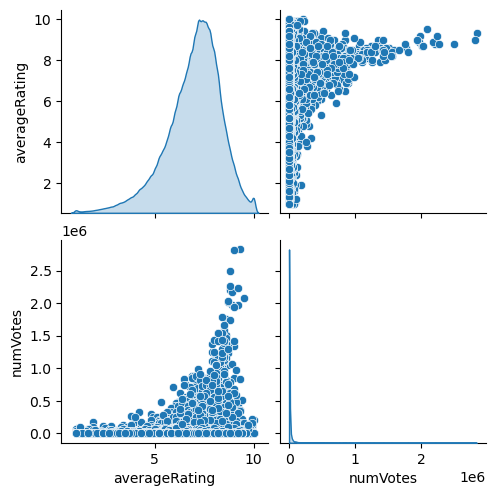

In [3]:
# Basic EDA
print(df.describe())  # Summary statistics
print(df.isnull().sum())  # Check for missing values

# Visualization example
sns.pairplot(df, diag_kind='kde')  # 's' controls the marker size
plt.show()

In [4]:
#df = df.drop(columns=['tconst'])
print(df)

            tconst  averageRating  numVotes
0        tt0000001            5.7      2014
1        tt0000002            5.7       272
2        tt0000003            6.5      1935
3        tt0000004            5.4       179
4        tt0000005            6.2      2706
...            ...            ...       ...
1384945  tt9916730            7.6        11
1384946  tt9916766            7.1        23
1384947  tt9916778            7.2        36
1384948  tt9916840            8.8         6
1384949  tt9916880            8.2         6

[1384950 rows x 3 columns]


In [9]:
# Connect to SQLite database
conn = sqlite3.connect('films.db')

# Querying the database
query = "SELECT * FROM title_akas"
counts = pd.read_sql_query(query, conn)

# Calculate the counts
counts = counts.groupby('titleId').size().reset_index(name='count')

query = "SELECT * FROM title_akas WHERE isOriginalTitle = 1"
title_akas = pd.read_sql_query(query, conn) 

# Merge the count back into the original DataFrame
title_akas = title_akas.merge(counts, on='titleId', how='left')

# Close the connection
conn.close()

title_akas.head()

MemoryError: 

In [4]:
print(title_akas.describe())  # Summary statistics
print(title_akas.isnull().sum())  # Check for missing values

           ordering
count  1.835447e+06
mean   2.217259e+00
std    2.933326e+00
min    1.000000e+00
25%    1.000000e+00
50%    2.000000e+00
75%    2.000000e+00
max    1.760000e+02
titleId            0
ordering           0
title              2
region             0
language           0
types              0
attributes         0
isOriginalTitle    0
dtype: int64


In [5]:
# Connect to SQLite database
conn = sqlite3.connect('films.db')

query = "SELECT titleid, COUNT(CASE WHEN isOriginalTitle = 0 THEN 1 END) AS pocet_prekladov FROM title_akas GROUP BY titleid"
title_akas = pd.read_sql_query(query, conn) 

# Close the connection
conn.close()

title_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [14]:
# Connect to SQLite database
conn = sqlite3.connect('films.db')

query = "SELECT * FROM title_basics WHERE titleType = 'movie'"
title_ratings = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

title_ratings

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
2,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
...,...,...,...,...,...,...,...,...,...
667116,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
667117,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
667118,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
667119,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama


In [15]:
conn = sqlite3.connect('films.db')

query = "SELECT * FROM name_basics"
name_basics = pd.read_sql_query(query, conn)
conn.close()

name_basics

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0031983,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0075213"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0056404,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0077975,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050986,tt0069467,tt0050976"
...,...,...,...,...,...,...
13133608,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt2455546,tt11657662,tt14069590"
13133609,nm9993716,Essias Loberg,\N,\N,None,\N
13133610,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
13133611,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744
